# diabetes-detection

Use the "Run" button to execute the code.

## Getting Dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
url='https://raw.githubusercontent.com/Asad-cuet/Machine-Learning-Code/master/dataset/diabetes.csv'

In [3]:
import opendatasets as od
od.download(url)

Using downloaded and verified file: ./diabetes.csv


In [4]:
import pandas as pd
raw_df=pd.read_csv('diabetes.csv')

In [5]:
raw_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Identifying input and target columns

In [6]:
input_cols=list(raw_df.columns)[1:-1]  # Excluding last column by range [1:-1]. Python range works as like [ , )
input_cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [7]:
target_col=list(raw_df.columns)[-1]
target_col

'Outcome'

## Data Preprocessing

### Modifying target column

In [8]:
raw_df[target_col].unique()

array([1, 0])

We will convert 1,0 to Yes,No

In [9]:
target_col_values = {0:'NO' , 1: 'Yes'}
raw_df[target_col] = raw_df[target_col].map(target_col_values)  #map takes function or dictionary.if value is 0 return 'No', if 1 return 'Yes'

In [10]:
raw_df[target_col].unique()

array(['Yes', 'NO'], dtype=object)

<b style="color:green">Modified done</b>

### Remove row where target column is empty

In [11]:
raw_df[target_col].unique()

array(['Yes', 'NO'], dtype=object)

<b style="color:green">There is no invalid or empty cell. So skipping this step</b>

### Splitting Dataset

<b>Three parts:</b> <br>
<b>Training Set (70%) :</b> Train model <br>
<b>Test Set (30%) : </b> Accuracy Measurement <br>
<b>Manual Set (10% of Test Set) :</b> This data will used in single input test <br>

#### Splitting

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_df,test_df=train_test_split(raw_df,test_size=0.3,random_state=42)

In [14]:
test_df,manual_df=train_test_split(test_df,test_size=0.1,random_state=42)

random_state:This is to check and validate the data when running the code multiple times. Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code.

In [15]:
print('Raw Df Shape:',raw_df.shape)
print('Train Df Shape:',train_df.shape)
print('Test Df Shape:',test_df.shape)
print('Manual Df Shape:',manual_df.shape)

Raw Df Shape: (768, 9)
Train Df Shape: (537, 9)
Test Df Shape: (207, 9)
Manual Df Shape: (24, 9)


#### Inputs and target

In [16]:
train_inputs=train_df[input_cols].copy()
train_target=train_df[target_col].copy()

In [17]:
test_inputs=test_df[input_cols].copy()
test_target=test_df[target_col].copy()

In [18]:
manual_inputs=manual_df[input_cols].copy()
manual_target=manual_df[target_col].copy()

### Identify Numeric & Categorical Column

In [19]:
import numpy as np

In [20]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [21]:
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()
categorical_cols

[]

There is no categorical column in input columns

### Observing Numeric Columns

In [22]:
train_inputs[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 334 to 102
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   537 non-null    int64  
 1   BloodPressure             537 non-null    int64  
 2   SkinThickness             537 non-null    int64  
 3   Insulin                   537 non-null    int64  
 4   BMI                       537 non-null    float64
 5   DiabetesPedigreeFunction  537 non-null    float64
 6   Age                       537 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 33.6 KB


<b style="color:green">Look there is no nan values. So we can skip imputation step</b>

In [23]:
train_inputs[numeric_cols].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,120.849162,69.685289,20.432030,79.836127,31.975605,0.469920,33.074488
std,32.339523,18.094374,15.490715,115.196730,7.624495,0.342087,11.685319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,64.000000,0.000000,0.000000,26.800000,0.241000,24.000000
50%,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000
75%,139.000000,80.000000,32.000000,129.000000,36.500000,0.612000,41.000000
max,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


<b style="color:red">Look at min value. it is 0.So there is not nan value,nut have 0 value. We need to imputes these 0 values</b><br>
<b style="color:red">Look at min and max value. We need to scale the values</b>

### Processing Numeric Columns

#### Imputation

In [24]:
# Looking is there missing values
train_inputs[numeric_cols].isna().sum()  # isna() shows all missing data

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [25]:
# converting 0 to nan for imputation
raw_df[numeric_cols]=raw_df[numeric_cols].replace(0,np.nan)
train_inputs[numeric_cols]=train_inputs[numeric_cols].replace(0,np.nan)
test_inputs[numeric_cols]=test_inputs[numeric_cols].replace(0,np.nan)

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
imputer=SimpleImputer(strategy='mean') # reaplacing by mean value

In [28]:
imputer.fit(raw_df[numeric_cols])  # computing mean value from entire dataset.Beacause traing set, validation set, test set separated now. 
                                   # Stored is statistics_ 
                                   # You can see by imputer.statistics_

SimpleImputer()

In [29]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])

In [30]:
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [31]:
manual_inputs[numeric_cols]=imputer.transform(manual_inputs[numeric_cols])

In [32]:
train_inputs[numeric_cols].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,121.982186,72.247111,28.792601,155.437777,32.277816,0.469920,33.074488
std,30.138496,12.204823,8.475990,85.039099,6.964619,0.342087,11.685319
min,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000
25%,100.000000,64.000000,24.000000,120.000000,27.100000,0.241000,24.000000
50%,118.000000,72.000000,29.153420,155.548223,32.000000,0.374000,29.000000
75%,139.000000,80.000000,32.000000,155.548223,36.500000,0.612000,41.000000
max,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


Now look, min value is not zero

#### Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler=MinMaxScaler()

In [35]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [36]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])

In [37]:
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [38]:
manual_inputs[numeric_cols]=scaler.transform(manual_inputs[numeric_cols])

In [39]:
train_inputs[numeric_cols].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.503111,0.492317,0.236876,0.169997,0.287890,0.167344,0.201241
std,0.194442,0.124539,0.092130,0.102210,0.142426,0.146066,0.194755
min,0.000000,0.000000,0.010870,0.000000,0.000000,0.000000,0.000000
25%,0.361290,0.408163,0.184783,0.127404,0.182004,0.069599,0.050000
50%,0.477419,0.489796,0.240798,0.170130,0.282209,0.126388,0.133333
75%,0.612903,0.571429,0.271739,0.170130,0.374233,0.228010,0.333333
max,1.000000,1.000000,0.608696,1.000000,1.000000,1.000000,1.000000


<b style="color:green">Scaling Done</b>

### Processing Categorical Columns

<b>As there is no categorical columns in the dataset,we skipping this step</b>

### Saving Preprocessing Data (Optional)

In [40]:
pd.DataFrame(train_inputs).to_csv('train_inputs.csv')
pd.DataFrame(train_target).to_csv('train_target.csv')

In [41]:
pd.DataFrame(test_inputs).to_csv('test_inputs.csv')
pd.DataFrame(test_target).to_csv('test_target.csv')

In [42]:
pd.DataFrame(manual_inputs).to_csv('manual_inputs.csv')
pd.DataFrame(manual_target).to_csv('manual_target.csv')

In [43]:
pd.DataFrame(manual_df).to_csv('manual_df.csv')

## Training Model

In [44]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')

In [45]:
model.fit(train_inputs,train_target)

LogisticRegression(solver='liblinear')

## Predicting on Train set,Test set 

In [46]:
train_preds=model.predict(train_inputs)

In [47]:
test_preds=model.predict(test_inputs)

## Testing: Comparing prediction with target values

### Accuracy Score

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(train_target,train_preds)

0.7783985102420856

In [50]:
accuracy_score(test_target,test_preds)

0.7584541062801933

### Confusion Matriix

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(train_target,train_preds,normalize='true')

array([[0.90544413, 0.09455587],
       [0.45744681, 0.54255319]])

In [53]:
confusion_matrix(test_target,test_preds,normalize='true')

array([[0.84671533, 0.15328467],
       [0.41428571, 0.58571429]])

### Both in Visualization

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return accuracy

Accuracy: 77.84%


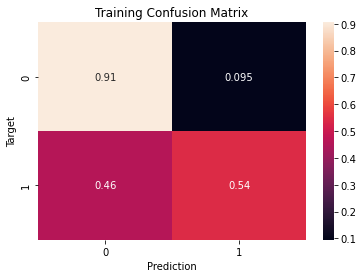

In [55]:
training_accuracy = predict_and_plot(train_inputs, train_target, 'Training')

Accuracy: 75.85%


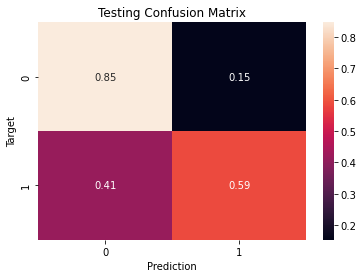

In [56]:
test_accuracy = predict_and_plot(test_inputs, test_target, 'Testing')

Accuracy: 66.67%


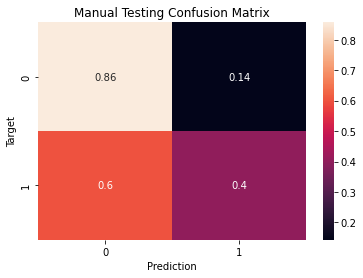

In [67]:
manual_accuracy = predict_and_plot(manual_inputs, manual_target, 'Manual Testing')

## Predicting on Single input

### Taking input

In [57]:
pd.read_csv('manual_df.csv')

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,351,4,137,84,0,0,31.2,0.252,30,NO
1,210,2,81,60,22,0,27.7,0.290,25,NO
2,148,5,147,78,0,0,33.7,0.218,65,NO
3,44,7,159,64,0,0,27.4,0.294,40,NO
4,356,1,125,50,40,167,33.3,0.962,28,Yes
5,559,11,85,74,0,0,30.1,0.300,35,NO
6,209,7,184,84,33,0,35.5,0.355,41,Yes
7,145,0,102,75,23,0,0.0,0.572,21,NO
8,60,2,84,0,0,0,0.0,0.304,21,NO
9,706,10,115,0,0,0,0.0,0.261,30,Yes


In [58]:
# All values is required
new_input={
    'Pregnancies':4,
    'Glucose':137,
    'BloodPressure':84,
    'SkinThickness':0,
    'Insulin':0,
    'BMI':31.2,
    'DiabetesPedigreeFunction':0.252,
    'Age':30
}

### Preprocess the input

We did in the model input: scaling

In [59]:
new_input_df=pd.DataFrame([new_input])
new_input_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4,137,84,0,0,31.2,0.252,30


In [60]:
new_input_df[numeric_cols]=imputer.transform(new_input_df[numeric_cols]) #imputing
new_input_df[numeric_cols]=scaler.transform(new_input_df[numeric_cols]) # scaling

### Predicting

In [61]:
inputs=inputs=new_input_df[numeric_cols]

In [62]:
prediction=model.predict(inputs)[0]
prediction

'NO'

In [63]:
probability=model.predict_proba(inputs)[0]
probability

array([0.69031315, 0.30968685])

### Input prediction in 1 function

In [64]:
def predictInput(new_input):
    global test_accuracy
    new_input_df=pd.DataFrame([new_input])
    
    new_input_df[numeric_cols]=imputer.transform(new_input_df[numeric_cols]) #imputing
    new_input_df[numeric_cols]=scaler.transform(new_input_df[numeric_cols]) # scaling
    
    inputs=inputs=new_input_df[numeric_cols]
    
    prediction=model.predict(inputs)[0]
    probability=model.predict_proba(inputs)[0]
    
    print('Testing Accuracy of the Model:',round(test_accuracy*100),'%')
    print('Diabetes Result:',prediction)
    if(prediction=='Yes'):
        index=1
    if(prediction=='NO'):
        index=0   
    print('Probablity:',round(probability[index]*100),'%')

In [65]:
new_input={
    'Pregnancies':6,
    'Glucose':104,
    'BloodPressure':74,
    'SkinThickness':18,
    'Insulin':156,
    'BMI':29.9,
    'DiabetesPedigreeFunction':0.722,
    'Age':41
}

In [66]:
predictInput(new_input)

Testing Accuracy of the Model: 76 %
Diabetes Result: NO
Probablity: 74 %
